# Unsupervised Analysis of Days of Week

Treating crossing each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()


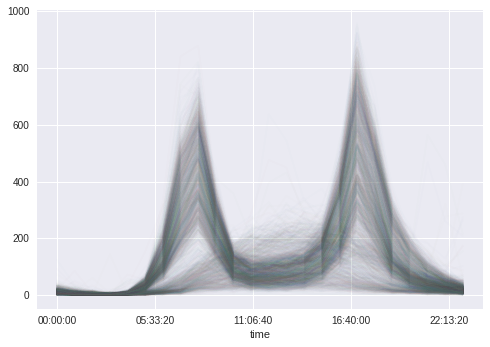

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2128, 24)

In [5]:
x2 = PCA(2, svd_solver='full').fit_transform(X)
x2.shape

(2128, 2)

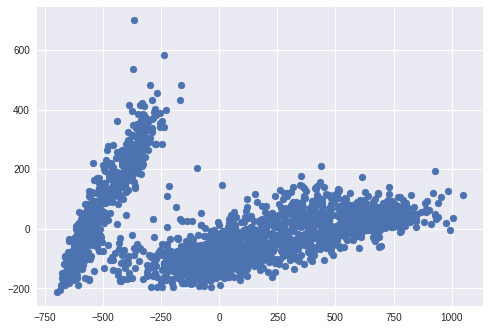

In [6]:
plt.scatter(x2[:, 0], x2[:, 1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 0, 0])

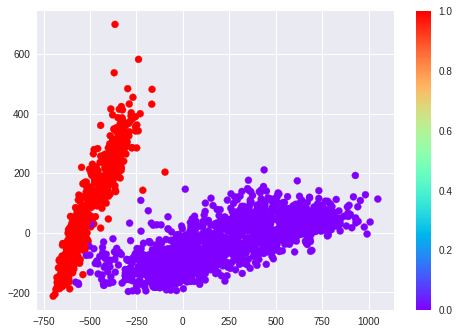

In [8]:
plt.scatter(x2[:, 0], x2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

Text(0.5,1,'Red Cluster')

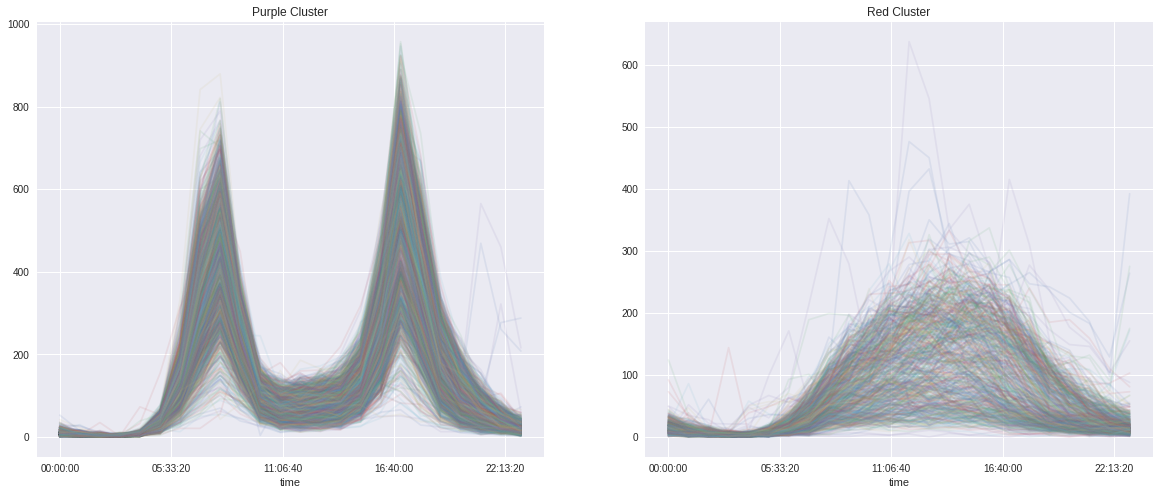

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with Day of Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

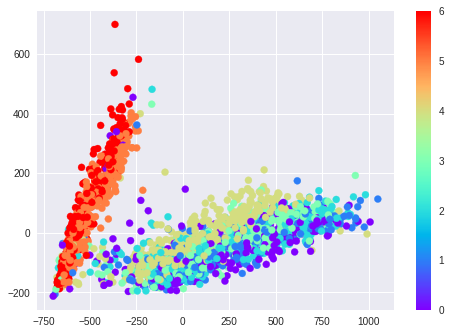

In [11]:
plt.scatter(x2[:, 0], x2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)